In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [24]:
particlesDict = {}

In [25]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [26]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [56]:
def particlePair(pdgID,file_name):
    inv_mass = []
    
    for e,event in enumerate(pylheV.readLHE(file_name)):
        leptonDict = {pdgID:[],-pdgID:[]}
        
        for index,ptc in enumerate(event.particles):
            if (ptc.status > 0) and (leptonDict.get(ptc.id,0) != 0):
                    leptonDict[ptc.id] = leptonDict[ptc.id] +  [[ptc.e,ptc.px,ptc.py,ptc.pz]]
                    
        len_particle = len(leptonDict[pdgID])
        len_antiparticle = len(leptonDict[pdgID])
        if (len_particle == len_antiparticle):
            for i in range(len_particle):
                inv_mass.append(invariant_mass(leptonDict[pdgID] + leptonDict[-pdgID]))
        elif (len_particle < len_antiparticle):
            for i in range(len_particle):
                inv_mass.append(invariant_mass(leptonDict[pdgID] + leptonDict[-pdgID]))
        else:
            for i in range(len_antiparticle):
                inv_mass.append(invariant_mass(leptonDict[pdgID] + leptonDict[-pdgID]))
        
    return inv_mass

In [91]:
def particlesPair(pdgID,file_name):
    inv_mass = {}
    for iD in pdgID:
        inv_mass[iD] = []
        
    for e,event in enumerate(pylheV.readLHE(file_name)):
        leptonDict = {}
        for iD in pdgID:
            leptonDict[iD] = []
            leptonDict[-iD] = []
        
        
        for ptc in event.particles:
            if (ptc.status > 0) and (leptonDict.get(ptc.id,0) != 0):
                    leptonDict[ptc.id] = leptonDict[ptc.id] +  [[ptc.e,ptc.px,ptc.py,ptc.pz]]
                    
        for iD in pdgID:  
            len_particle = len(leptonDict[iD])
            len_antiparticle = len(leptonDict[iD])
            if (len_particle == len_antiparticle):
                for i in range(len_particle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
            elif (len_particle < len_antiparticle):
                for i in range(len_particle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
            else:
                for i in range(len_antiparticle):
                    inv_mass[iD] = inv_mass[iD] + [invariant_mass(leptonDict[iD] + leptonDict[-iD])]
        
    return inv_mass

In [64]:
def invariant_mass(ptc_list):
    
    energy = 0
    px = 0
    py = 0
    pz = 0
    for ptc in ptc_list:
        energy = energy +  ptc[0]
        px = px + ptc[1]
        py =py +  ptc[2]
        pz = pz + ptc[3]
        
    m_square = energy**2 - px**2 - py**2 - pz**2
    if m_square >= 0:
        return np.sqrt(m_square)
    else:
        return
    

In [32]:
cross_section_lplm = [2140,2428,1715] #pb
cross_section_n = [6.261,328.9,46.02]

In [83]:
#m_lplm_50 = m_lplm_100 = m_lplm_150 = m_nuBarnu_50 = m_nuBarnu_100 = m_nuBarnu_150 = []

iD = [11,12,13,14,16]
    
m_lplm_50 =  particlesPair(iD,'lplm_50GeV.lhe')
m_lplm_100 =  particlesPair(iD,'lplm_100GeV.lhe')
m_lplm_150 =  particlesPair(iD,'lplm_150GeV.lhe')
m_nuBarnu_50 =  particlesPair(iD,'nuBarnu_50GeV.lhe')
m_nuBarnu_100 =  particlesPair(iD,'nuBarnu_100GeV.lhe')
m_nuBarnu_150 =  particlesPair(iD,'nuBarnu_150GeV.lhe')


In [90]:
print(m_lplm_150[11])

[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0

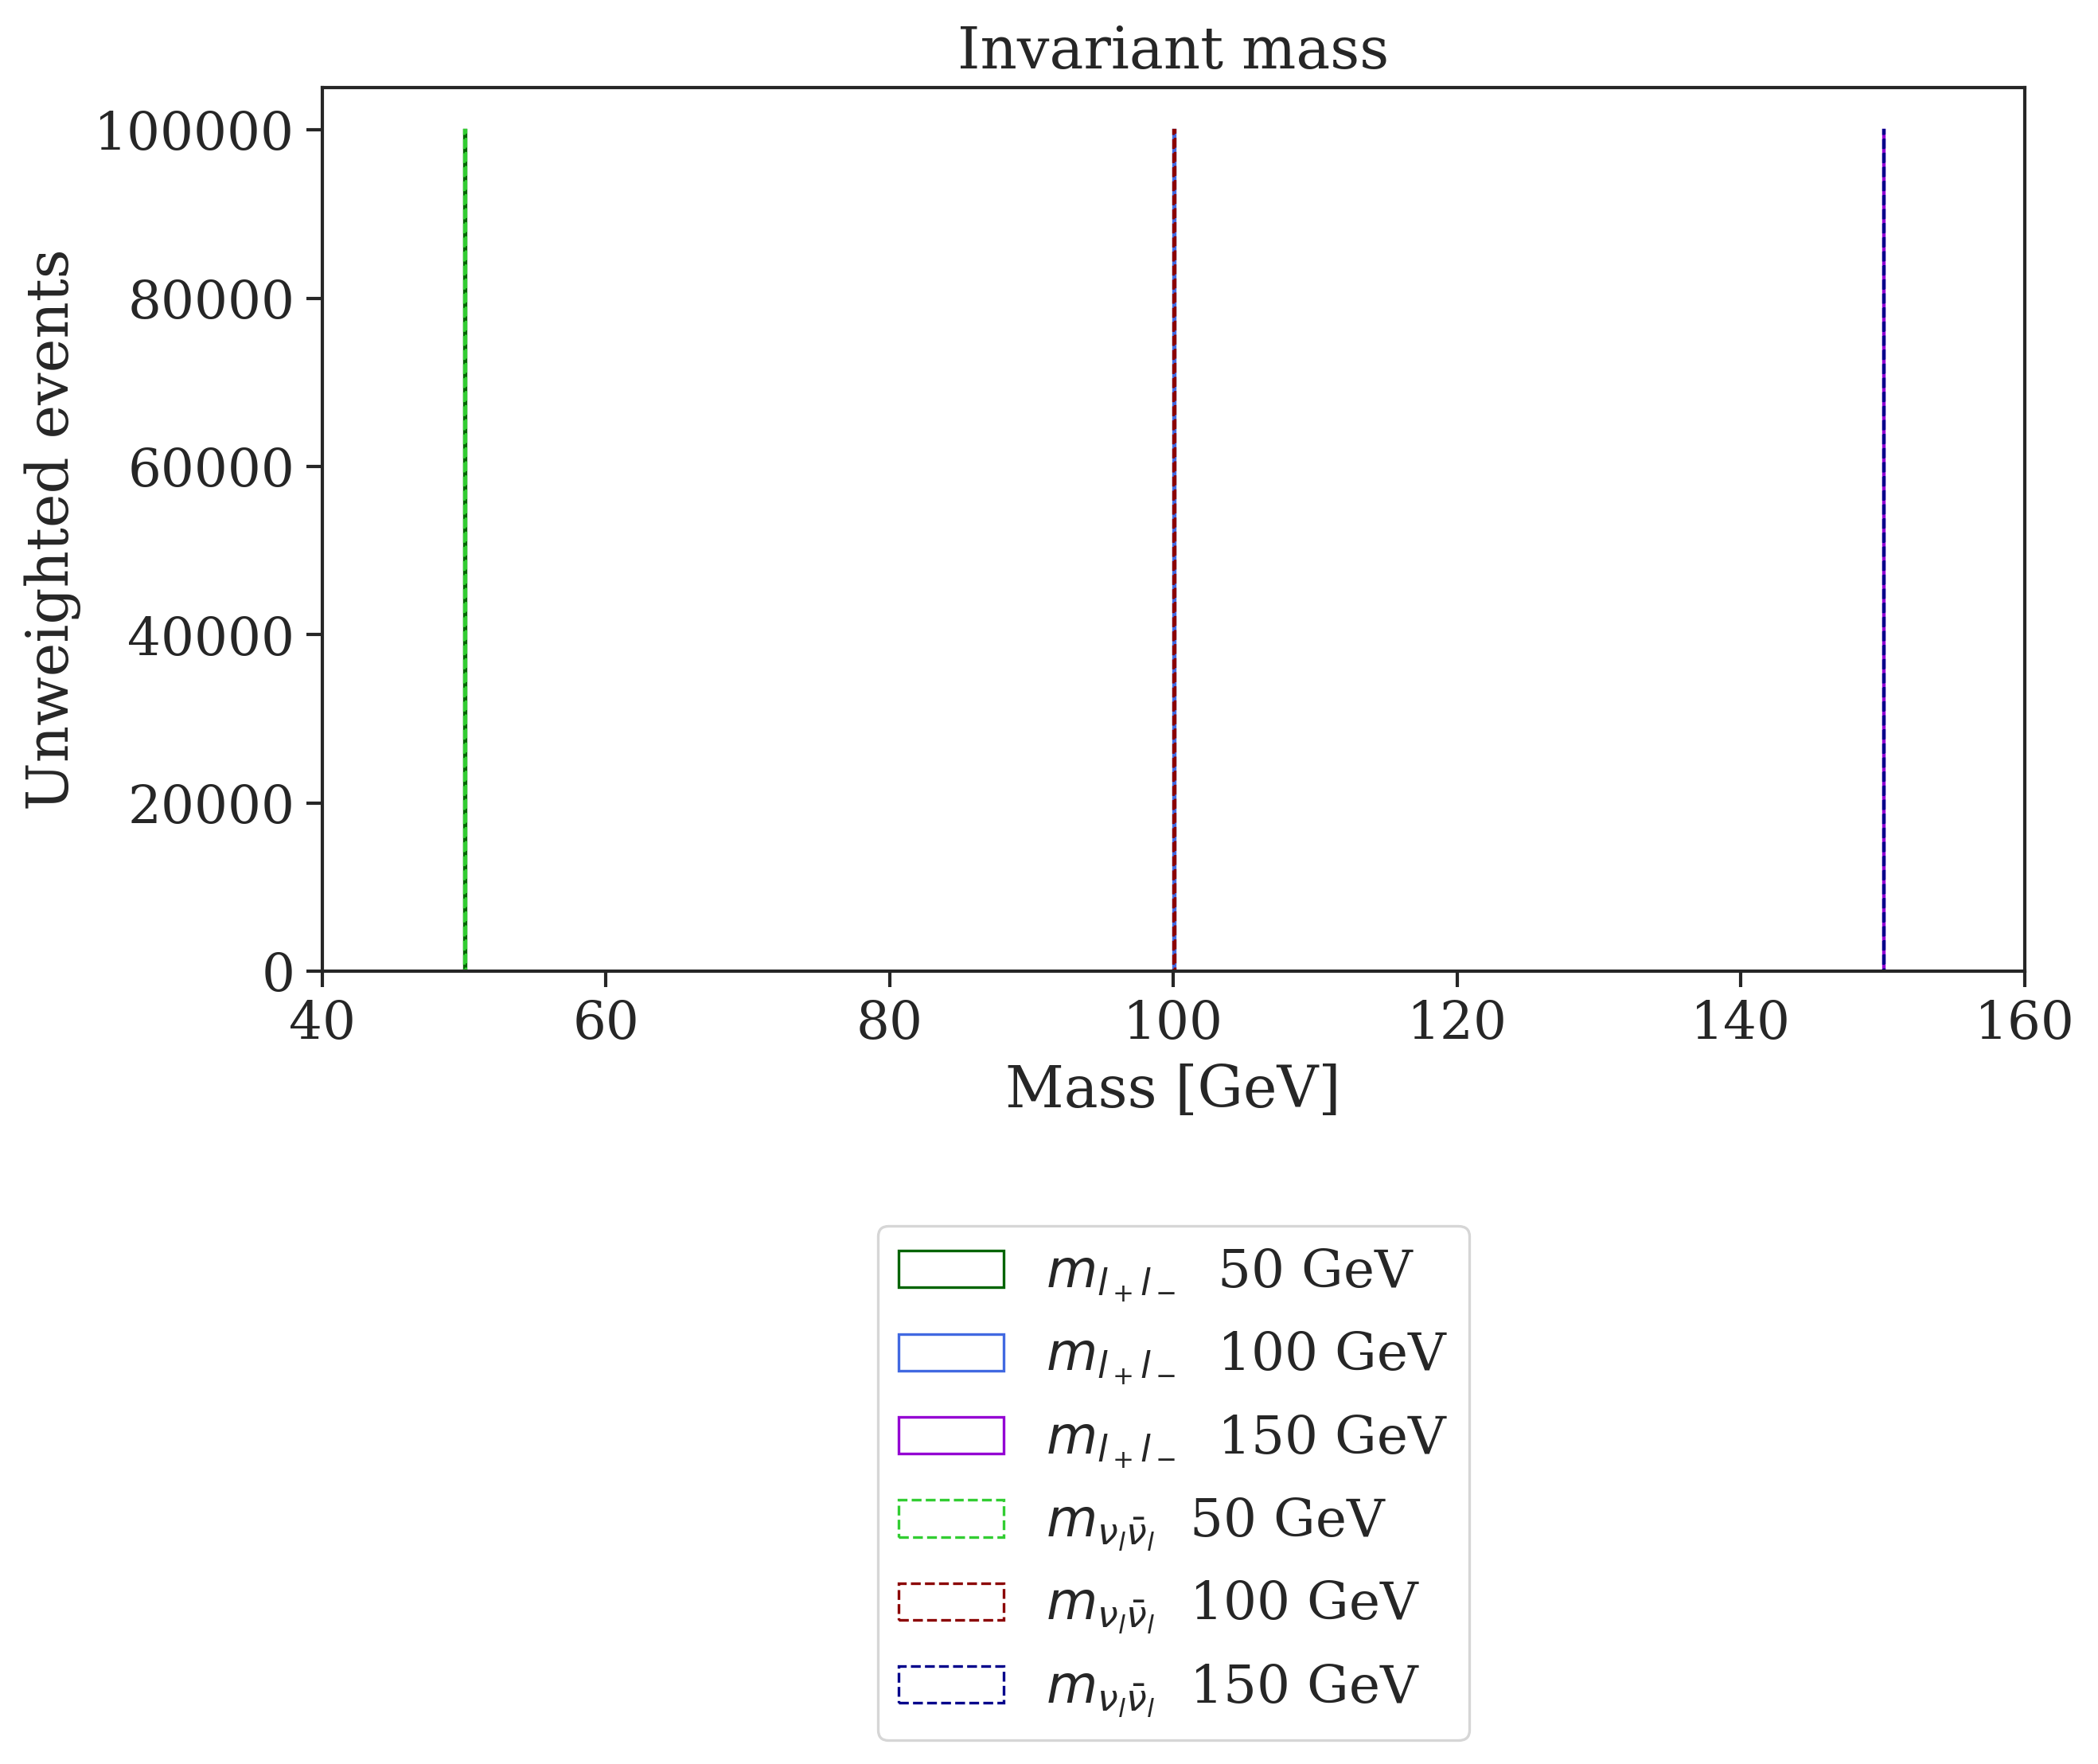

In [89]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.hist(m_lplm_50[11] + m_lplm_50[13], bins = 10, histtype = 'step',  color = 'darkgreen',label =r'$m_{l_+l_-}$  50 GeV ')
plt.hist(m_lplm_100[11] + m_lplm_100[13], bins = 10,  histtype = 'step',color = 'royalblue',label =r'$m_{l_+l_-}$  100 GeV ')
plt.hist(m_lplm_150[11] + m_lplm_150[13], bins = 10,  histtype = 'step',color = 'darkviolet',label =r'$m_{l_+l_-}$  150 GeV ')
plt.hist(m_nuBarnu_50[12] + m_nuBarnu_50[14] + m_nuBarnu_50[16], bins = 10, histtype = 'step', ls = '--',  color = 'limegreen',label =r'$m_{\nu_l\bar{\nu}_l}$  50 GeV ')
plt.hist(m_nuBarnu_100[12] + m_nuBarnu_100[14] + m_nuBarnu_100[16], bins = 10, histtype = 'step', ls = '--', color = 'darkred',label =r'$m_{\nu_l\bar{\nu}_l}$  100 GeV ')
plt.hist(m_nuBarnu_150[12] + m_nuBarnu_150[14] + m_nuBarnu_150[16], bins = 10, histtype = 'step',  ls = '--',color = 'darkblue',label =r'$m_{\nu_l\bar{\nu}_l}$  150 GeV ')



plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass')
plt.ylabel(r'Unweighted events')
plt.xlim([40,160])
plt.legend(bbox_to_anchor=(0.5, -0.9), loc='lower center')
plt.savefig('Invariant_mass_epem.pdf')
plt.show()

In [92]:

iD = [11,12,13,14,16]
    
mlplm_50 =  particlesPair(iD,'out_lplm_50GeV.lhe')
mlplm_100 =  particlesPair(iD,'out_lplm_100GeV.lhe')
mlplm_150 =  particlesPair(iD,'out_lplm_150GeV.lhe')
mnuBarnu_50 =  particlesPair(iD,'out_nuBarnu_50GeV.lhe')
mnuBarnu_100 =  particlesPair(iD,'out_nuBarnu_100GeV.lhe')
mnuBarnu_150 =  particlesPair(iD,'out_nuBarnu_150GeV.lhe')

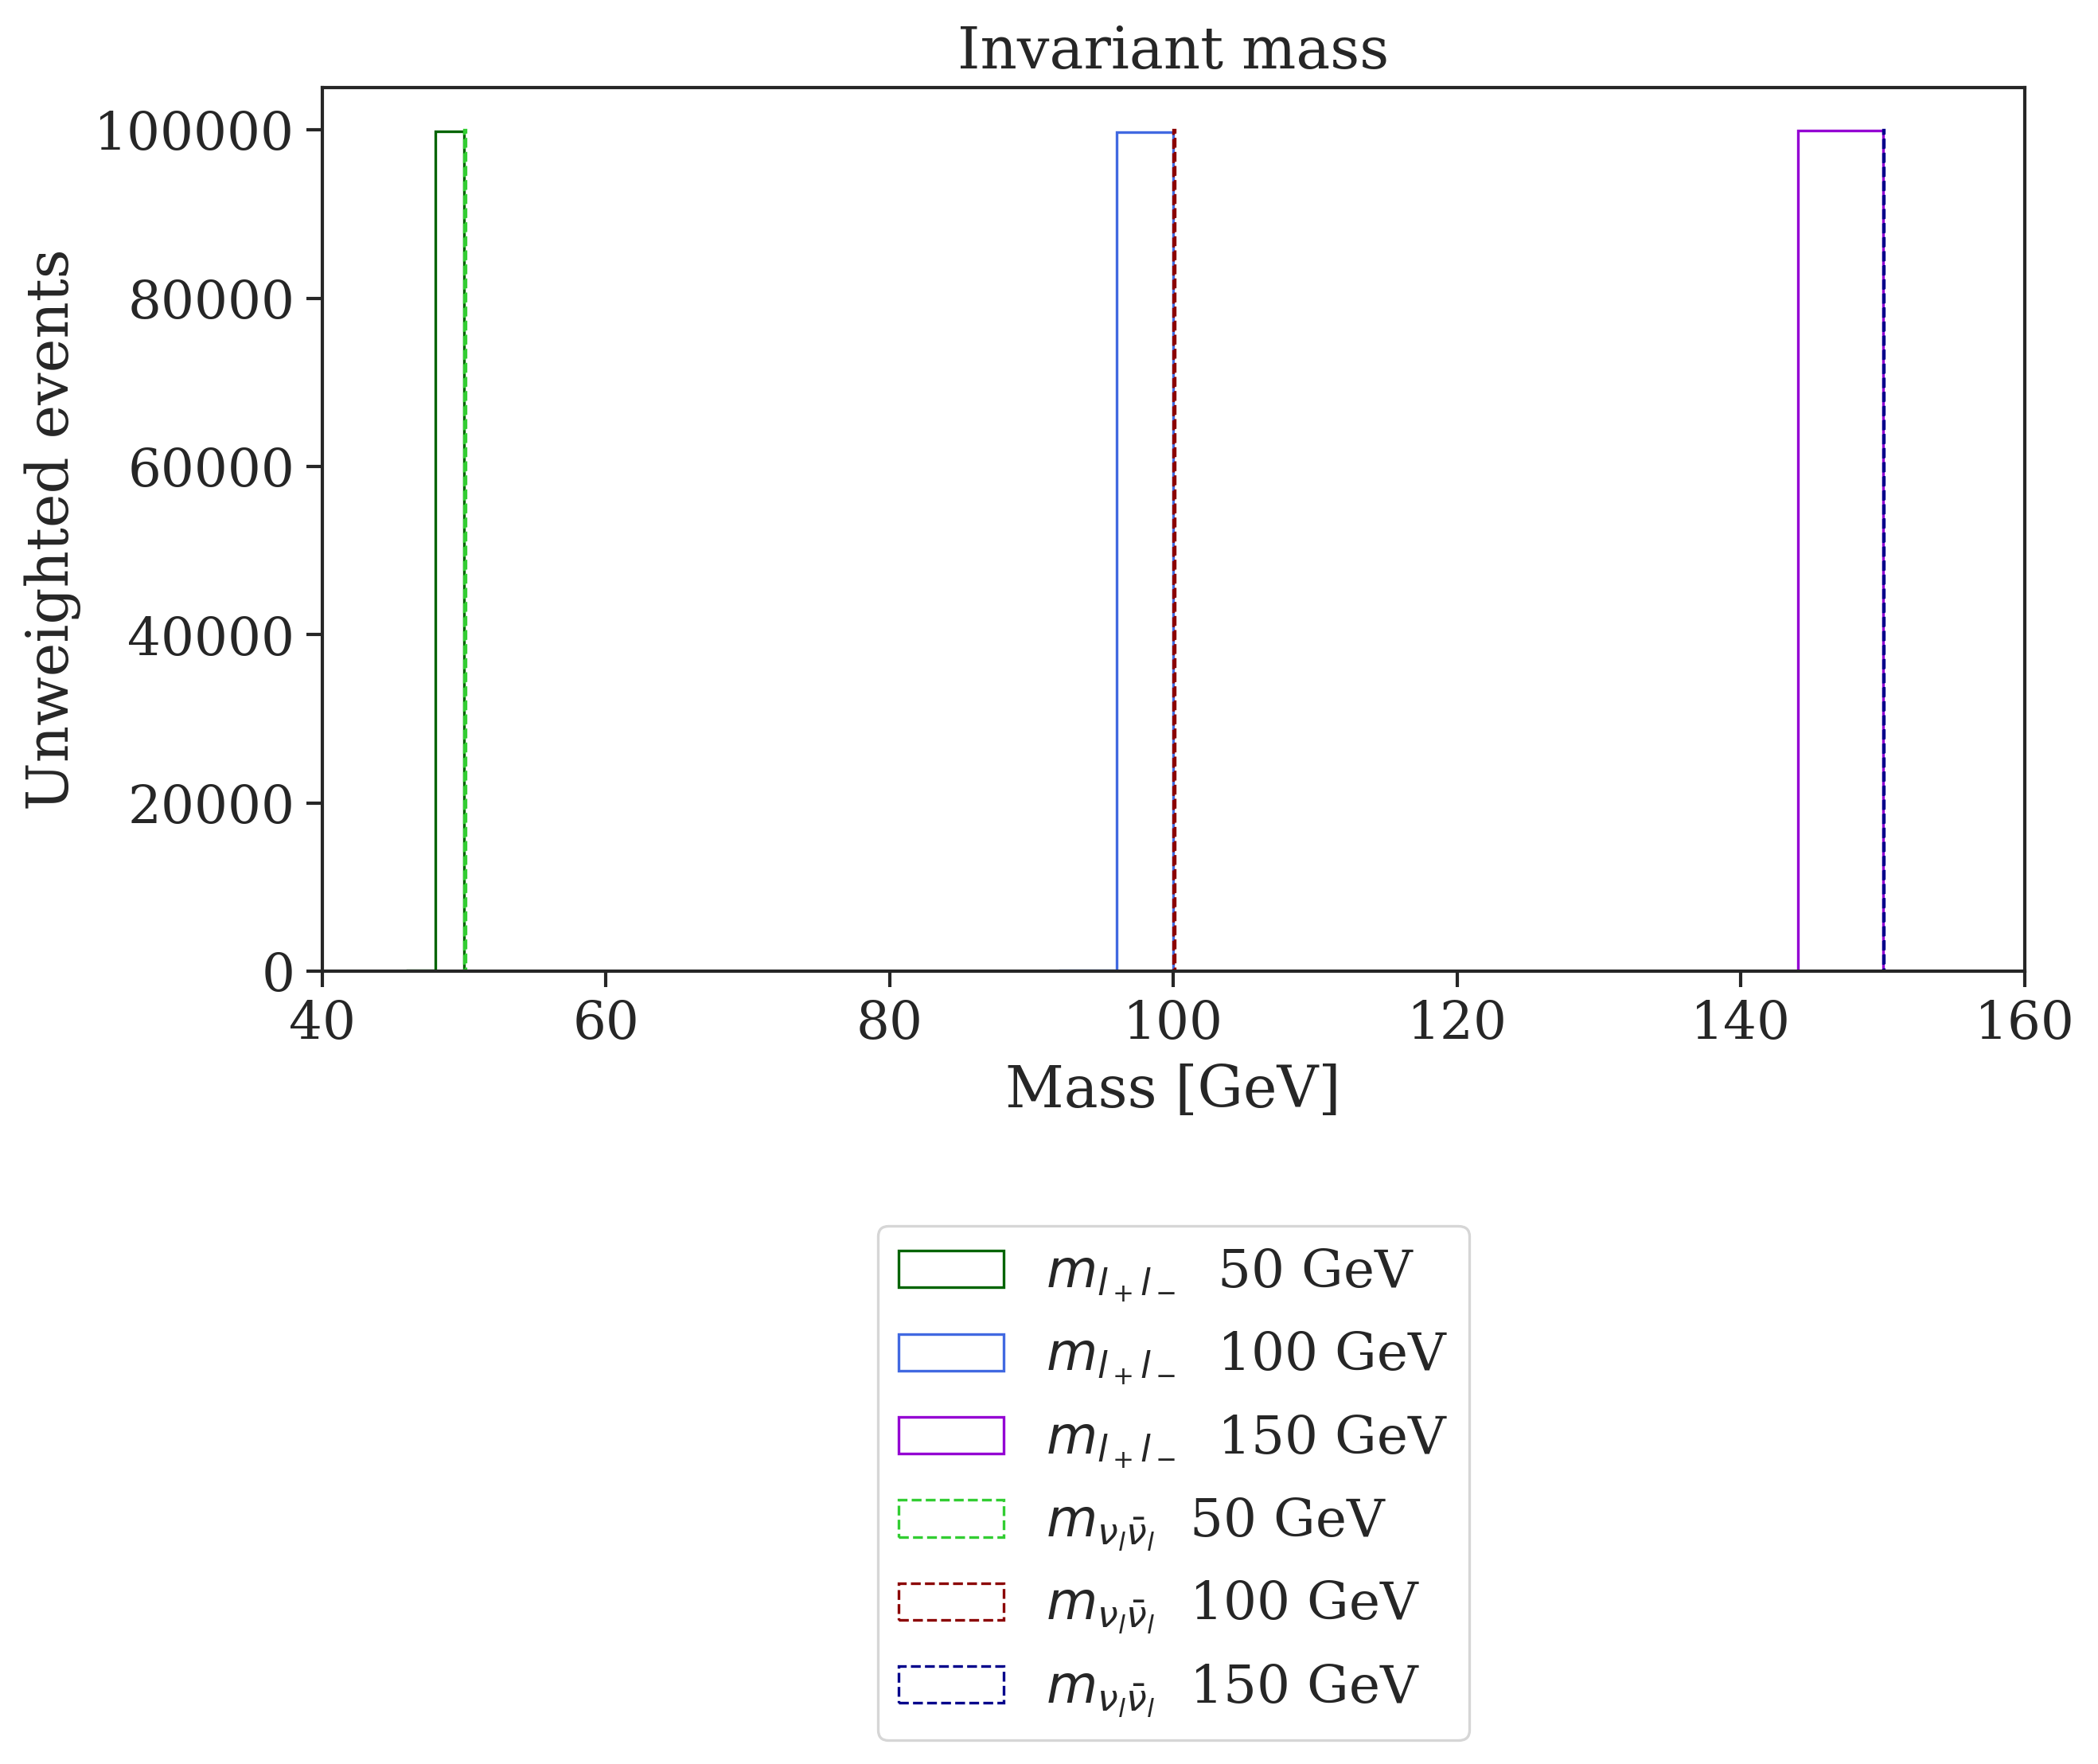

In [95]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.hist(mlplm_50[11] + mlplm_50[13], bins = 25, histtype = 'step',  color = 'darkgreen',label =r'$m_{l_+l_-}$  50 GeV ')
plt.hist(mlplm_100[11] + mlplm_100[13], bins = 25,  histtype = 'step',color = 'royalblue',label =r'$m_{l_+l_-}$  100 GeV ')
plt.hist(mlplm_150[11] + mlplm_150[13], bins = 25,  histtype = 'step',color = 'darkviolet',label =r'$m_{l_+l_-}$  150 GeV ')
plt.hist(mnuBarnu_50[12] + mnuBarnu_50[14] + m_nuBarnu_50[16], bins = 10, histtype = 'step', ls = '--',  color = 'limegreen',label =r'$m_{\nu_l\bar{\nu}_l}$  50 GeV ')
plt.hist(mnuBarnu_100[12] + mnuBarnu_100[14] + m_nuBarnu_100[16], bins = 10, histtype = 'step', ls = '--', color = 'darkred',label =r'$m_{\nu_l\bar{\nu}_l}$  100 GeV ')
plt.hist(mnuBarnu_150[12] + mnuBarnu_150[14] + m_nuBarnu_150[16], bins = 10, histtype = 'step',  ls = '--',color = 'darkblue',label =r'$m_{\nu_l\bar{\nu}_l}$  150 GeV ')



plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass')
plt.ylabel(r'Unweighted events')
plt.xlim([40,160])
plt.legend(bbox_to_anchor=(0.5, -0.9), loc='lower center')
plt.savefig('Invariant_mass_epem.pdf')
plt.show()

In [ ]:
rebecapurple, green, royalblue

In [100]:
count = 0
for e,event in enumerate(pylheV.readLHE('lplm_100GeV.lhe')):
        for ptc in event.particles:
            if abs(ptc.id) == 23:
                count+=1
                
print(count)

1192
